In [6]:
# !pip3 install --upgrade tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

In [8]:
tf.test.is_gpu_available()

False

In [9]:
BATCH=16
EPOCH=50

In [10]:
train_data_gen = idg(rescale = 1./255, rotation_range = 0.2,shear_range = 0.2, zoom_range = 0.2,
                     width_shift_range = 0.2, height_shift_range = 0.2, validation_split = 0.2)

train_data=train_data_gen.flow_from_directory(r'C:\Users\ASUS\Downloads\CV Project\Data\Train',target_size=(80,80),
                                              batch_size=BATCH,class_mode='categorical',subset='training')
# train_data=train_data.repeat()

validation_data= train_data_gen.flow_from_directory(r'C:\Users\ASUS\Downloads\CV Project\Data\Train',target_size=(80,80),
                                                    batch_size=BATCH,class_mode='categorical',subset='validation')

Found 64523 images belonging to 2 classes.
Found 16130 images belonging to 2 classes.


In [11]:
test_data_gen = idg(rescale = 1./255)

test_data=test_data_gen.flow_from_directory(r'C:\Users\ASUS\Downloads\CV Project\Data\Test',target_size=(80,80),
                                            batch_size=BATCH,class_mode='categorical')

Found 4245 images belonging to 2 classes.


In [12]:
base_model=InceptionV3(include_top = False, weights = 'imagenet', input_tensor = Input(shape = (80,80,3)))
head_model=base_model.output

In [13]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 80, 80, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 39, 39, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 39, 39, 32)        │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 39, 39, 32)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 37, 37, 32)        │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 37, 37, 32)        │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 37, 37, 32)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 37, 37, 64)        │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 37, 37, 64)        │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 37, 37, 64)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 18, 18, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 18, 18, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 18, 18, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 18, 18, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 16, 16, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [33]:
head_model=Flatten()(head_model)
head_model=Dense(64,activation='relu')(head_model)
head_model=Dropout(0.5)(head_model)
head_model=Dense(2,activation='softmax')(head_model)

In [34]:
model=Model(inputs=base_model.input, outputs=head_model)
for layer in base_model.layers:
    layer.trainable=False

In [35]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 80, 80, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 39, 39, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 39, 39, 32)        │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 39, 39, 32)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 37, 37, 32)        │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 37, 37, 32)        │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 37, 37, 32)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 37, 37, 64)        │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 37, 37, 64)        │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 37, 37, 64)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 18, 18, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 18, 18, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 18, 18, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 18, 18, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 16, 16, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,934,050 (83.67 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [37]:
checkpoint=ModelCheckpoint(r'C:\Users\ASUS\Downloads\CV Project\Models\model_checkpoint.keras',monitor='val_loss',save_best_only=True,verbose=3)

early_stopping=EarlyStopping(monitor='val_loss',patience=7,verbose=3,restore_best_weights=True)

learning_rate=ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)

In [38]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_data,steps_per_epoch=train_data.samples // BATCH,validation_data=validation_data,
                    validation_steps=validation_data.samples // BATCH,callbacks=[checkpoint, early_stopping, learning_rate],epochs=EPOCH)

Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4032/4032 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8786 - loss: 0.2989
Epoch 1: val_loss improved from inf to 0.21491, saving model to C:\Users\ASUS\Downloads\CV Project\Models\model_checkpoint.keras
4032/4032 ━━━━━━━━━━━━━━━━━━━━ 435s 105ms/step - accuracy: 0.8787 - loss: 0.2989 - val_accuracy: 0.9017 - val_loss: 0.2149 - learning_rate: 0.0010
Epoch 2/50
   1/4032 ━━━━━━━━━━━━━━━━━━━━ 5:53 88ms/step - accuracy: 0.8750 - loss: 0.1705

C:\Users\ASUS\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.21491 to 0.00336, saving model to C:\Users\ASUS\Downloads\CV Project\Models\model_checkpoint.keras
4032/4032 ━━━━━━━━━━━━━━━━━━━━ 3s 710us/step - accuracy: 0.8750 - loss: 0.1705 - val_accuracy: 1.0000 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 3/50
4032/4032 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9075 - loss: 0.2258
Epoch 3: val_loss did not improve from 0.00336
4032/4032 ━━━━━━━━━━━━━━━━━━━━ 414s 103ms/step - accuracy: 0.9075 - loss: 0.2258 - val_accuracy: 0.9141 - val_loss: 0.2072 - learning_rate: 0.0010
Epoch 4/50
   1/4032 ━━━━━━━━━━━━━━━━━━━━ 4:13 63ms/step - accuracy: 0.8750 - loss: 0.2917
Epoch 4: val_loss did not improve from 0.00336
4032/4032 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.8750 - loss: 0.2917 - val_accuracy: 1.0000 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 5/50
4032/4032 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9109 - loss: 0.2213
Epoch 5: val_loss did not improve from 0.00336

Epoch 5: ReduceLROn

Model Evaluation

In [39]:
loss_train, acc_train = model.evaluate(train_data)
print(acc_train)
print(loss_train)

4033/4033 ━━━━━━━━━━━━━━━━━━━━ 343s 85ms/step - accuracy: 0.9371 - loss: 0.1743
0.9365032911300659
0.17259351909160614


In [40]:
loss_val, acc_val = model.evaluate(validation_data)
print(acc_val)
print(loss_val)

1009/1009 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.9242 - loss: 0.2021
0.918846845626831
0.2080608755350113


In [43]:
loss_test, acc_test = model.evaluate(test_data)
print(acc_test)
print(loss_test)

266/266 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.8349 - loss: 0.3322
0.8438162803649902
0.3198901414871216


Validation Graphs

In [45]:
import matplotlib.pyplot as plt

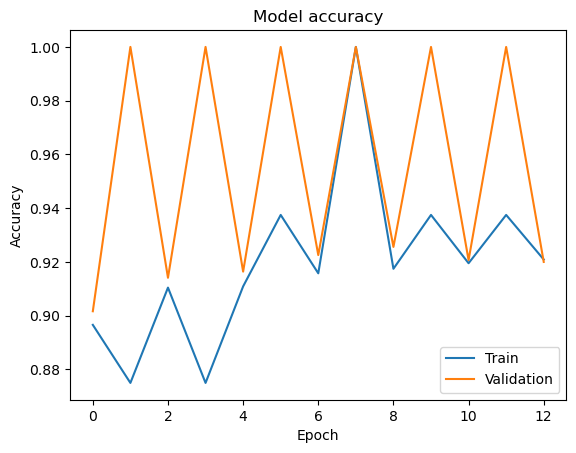

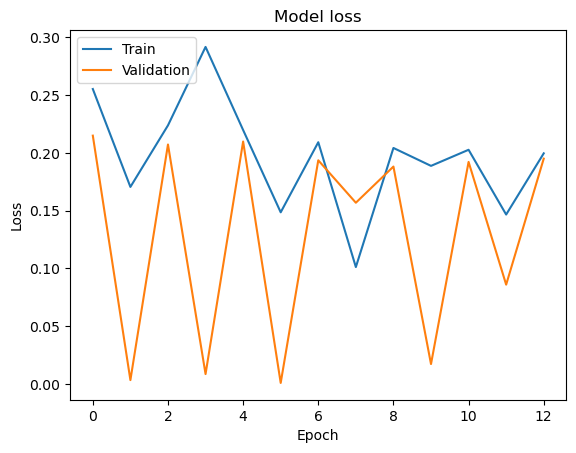

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()